# Visualize Seismic Design Results

In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
import pandas as pd

def search_section_property(target_size, section_database):
    """
    This function is used to obtain the section property when section size is given.
    The output will be stored in a dictionary.
    :param target_size: a string which defines section size, e.g. 'W14X500'
    :param section_database: a dataframe read from SMF_Section_Property.csv in "Library" folder
    :return: section_info: a dictionary which includes section size, index, and associated properties.
    """
    # Loop over the sections in the SMF section database and find the one which matches the target size
    # Then the property of the target section is returned as a dictionary.
    # If target size cannot match any existing sizes in database, a warning message should be given.
    try:
        for indx in np.array(section_database['index']):
            if target_size == section_database.loc[indx, 'section size']:
                section_info = section_database.loc[indx, :]
        return section_info.to_dict()
    except:
        sys.stderr.write('Error: wrong size nominated!\nNo such size exists in section database!')
        sys.exit(1)

In [2]:
# Base directory: where the SeismicDesignModule package is stored
base_directory = 'C:\\Users\\XINGQUAN GUAN\\Documents\\GitHub\\SeismicDesignModule'

# Postprocessing folder path
postprocessing_directory = base_directory + '\\Poseprocessing'

# Preprocessing folder path
preprocessing_directory = base_directory + '\\Preprocessing'

# Design results folder path
design_directory = base_directory + '\\BuildingData'

# Typical story height
typical_story_height = 13

# Load the section database
os.chdir(base_directory)
with open('SMF_Section_Property.csv', 'r') as file:
    SECTION_DATABASE = pd.read_csv(file, header=0)

# Load the design sampling space
os.chdir(preprocessing_directory)
with open('DesignSheet2.csv', 'r') as file:
    DESIGN_SPACE = pd.read_csv(file, header=0)

# The influence of Dead Load

In [14]:
# Fix all other parameters while studying influence of dead load
number_story = 1
bay_width = 30
story_height_ratio = 1.0
number_bay = 1
dead_load_roof = 20
column_beam_ratio = 1.0

# Varying the number of bay (bay is significant factor affecting structure layout)


# Key factor
dead_load_floor = [50, 80, 110]

# Loop over the database to find the building ID that satisfied the parameters defined above
target_ID = []  # Variable to store the building ID that studies dead load influence
row_number = DESIGN_SPACE.shape[0]
for indx in range(row_number):
    if (DESIGN_SPACE.loc[indx, 'number of story'] == number_story 
        and DESIGN_SPACE.loc[indx, 'bay width'] == bay_width 
        and DESIGN_SPACE.loc[indx, 'story height ratio'] == story_height_ratio
        and DESIGN_SPACE.loc[indx, 'number of bay'] == number_bay 
        and DESIGN_SPACE.loc[indx, 'dead load roof'] == dead_load_roof 
        and DESIGN_SPACE.loc[indx, 'column beam ratio'] == column_beam_ratio):
            target_ID.append(DESIGN_SPACE.loc[indx, 'building ID'])

# Read the Design Results for Those Buildings
beam = []
exterior_column = []
interior_column = []
double_plate_thickness = []
for ID in target_ID:
    beam_per_building = []
    exterior_column_per_building = []
    interior_column_per_building = []
    target_path = design_directory + "\\Building_" + str(ID)
    os.chdir(target_path)
    with open('ConstructionSize.csv', 'r') as file:
        MemberSize = pd.read_csv(file, header=0)
    row_number = MemberSize.shape[0]
    for story in range(row_number):
        beam_per_building.append(MemberSize.loc[story, 'beam'])
        exterior_column_per_building.append(MemberSize.loc[story, 'exterior column'])
        interior_column_per_building.append(MemberSize.loc[story, 'interior column'])
    beam.append(beam_per_building)
    exterior_column.append(exterior_column_per_building)
    interior_column.append(interior_column_per_building)

In [15]:
# Visualize the results
# The quantities to quantify those section sizes
beam_Zx = []
exterior_column_Ix = []
interior_column_Ix = []
for each in range(len(beam)):
    beam_Zx_per_building = []
    exterior_column_Ix_per_building = []
    interior_column_Ix_per_building = []
    for story in range(len(beam[0])):
        beam_Zx_per_building.append(search_section_property(beam[each][story], SECTION_DATABASE)['Ix'])
        exterior_column_Ix_per_building.append(search_section_property(exterior_column[each][story], SECTION_DATABASE)['Ix'])
        interior_column_Ix_per_building.append(search_section_property(interior_column[each][story], SECTION_DATABASE)['Ix'])
    beam_Zx.append(beam_Zx_per_building)
    exterior_column_Ix.append(exterior_column_Ix_per_building)
    interior_column_Ix.append(interior_column_Ix_per_building)



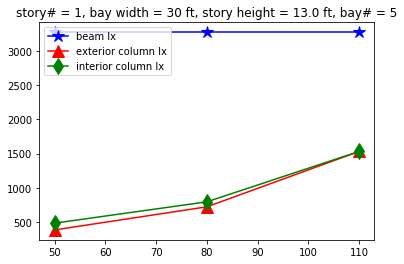

In [16]:
fig = plt.figure(figsize=(6, 4))
plt.plot(dead_load_floor, beam_Zx, color='blue', marker='*', markersize=12, label='beam Ix')
plt.plot(dead_load_floor, exterior_column_Ix, color='red', marker='^', markersize=12, label='exterior column Ix')
if number_bay != 1:
    plt.plot(dead_load_floor, interior_column_Ix, color='green', marker='d', markersize=12, label='interior column Ix')
plt.legend(loc='upper left')
plt.title('story# = %s, bay width = %s ft, story height = %s ft, bay# = %s' 
          % (number_story, bay_width, story_height_ratio*typical_story_height, number_bay))
plt.show()

# The Influence of Story Height

In [31]:
# Fix all other parameters while studying influence of dead load
number_story = 1
bay_width = 30
story_height_ratio = 1.0
number_bay = 5
dead_load_floor = 50
dead_load_roof = 20
column_beam_ratio = 1.0

# Key factor
story_height_ratio = [1.0*13, 1.5*13, 2.0*13]

# Loop over the database to find the building ID that satisfied the parameters defined above
target_ID = []  # Variable to store the building ID that studies dead load influence
row_number = DESIGN_SPACE.shape[0]
for indx in range(row_number):
    if (DESIGN_SPACE.loc[indx, 'number of story'] == number_story 
        and DESIGN_SPACE.loc[indx, 'bay width'] == bay_width 
        and DESIGN_SPACE.loc[indx, 'number of bay'] == number_bay 
        and DESIGN_SPACE.loc[indx, 'dead load floor'] == dead_load_floor
        and DESIGN_SPACE.loc[indx, 'dead load roof'] == dead_load_roof 
        and DESIGN_SPACE.loc[indx, 'column beam ratio'] == column_beam_ratio):
            target_ID.append(DESIGN_SPACE.loc[indx, 'building ID'])
# Read the Design Results for Those Buildings
beam = []
exterior_column = []
interior_column = []
double_plate_thickness = []
for ID in target_ID:
    beam_per_building = []
    exterior_column_per_building = []
    interior_column_per_building = []
    target_path = design_directory + "\\Building_" + str(ID)
    os.chdir(target_path)
    with open('ConstructionSize.csv', 'r') as file:
        MemberSize = pd.read_csv(file, header=0)
    row_number = MemberSize.shape[0]
    for story in range(row_number):
        beam_per_building.append(MemberSize.loc[story, 'beam'])
        exterior_column_per_building.append(MemberSize.loc[story, 'exterior column'])
        interior_column_per_building.append(MemberSize.loc[story, 'interior column'])
    beam.append(beam_per_building)
    exterior_column.append(exterior_column_per_building)
    interior_column.append(interior_column_per_building)

In [32]:
# Visualize the results
# The quantities to quantify those section sizes
beam_Zx = []
exterior_column_Ix = []
interior_column_Ix = []
for each in range(len(beam)):
    beam_Zx_per_building = []
    exterior_column_Ix_per_building = []
    interior_column_Ix_per_building = []
    for story in range(len(beam[0])):
        beam_Zx_per_building.append(search_section_property(beam[each][story], SECTION_DATABASE)['Ix'])
        exterior_column_Ix_per_building.append(search_section_property(exterior_column[each][story], SECTION_DATABASE)['Ix'])
        interior_column_Ix_per_building.append(search_section_property(interior_column[each][story], SECTION_DATABASE)['Ix'])
    beam_Zx.append(beam_Zx_per_building)
    exterior_column_Ix.append(exterior_column_Ix_per_building)
    interior_column_Ix.append(interior_column_Ix_per_building)

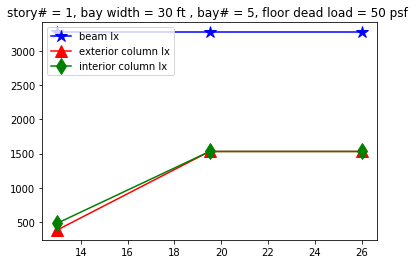

In [33]:
fig = plt.figure(figsize=(6, 4))
plt.plot(story_height_ratio, beam_Zx, color='blue', marker='*', markersize=12, label='beam Ix')
plt.plot(story_height_ratio, exterior_column_Ix, color='red', marker='^', markersize=12, label='exterior column Ix')
if number_bay != 1:
    plt.plot(story_height_ratio, interior_column_Ix, color='green', marker='d', markersize=12, label='interior column Ix')
plt.legend(loc='upper left')
plt.title('story# = %s, bay width = %s ft , bay# = %s, floor dead load = %s psf ' 
          % (number_story, bay_width, number_bay, dead_load_floor))
plt.show()

# Influence of Bay Number

In [46]:
# Fix all other parameters while studying influence of dead load
number_story = 1
bay_width = 40
story_height_ratio = 1.5
story_height_ratio = 1.0
dead_load_floor = 50
dead_load_roof = 20
column_beam_ratio = 1.0

# Target factor
number_bay = [1, 3, 5]

# Loop over the database to find the building ID that satisfied the parameters defined above
target_ID = []  # Variable to store the building ID that studies dead load influence
row_number = DESIGN_SPACE.shape[0]
for indx in range(row_number):
    if (DESIGN_SPACE.loc[indx, 'number of story'] == number_story 
        and DESIGN_SPACE.loc[indx, 'bay width'] == bay_width 
        and DESIGN_SPACE.loc[indx, 'story height ratio'] == story_height_ratio
        and DESIGN_SPACE.loc[indx, 'dead load floor'] == dead_load_floor
        and DESIGN_SPACE.loc[indx, 'dead load roof'] == dead_load_roof 
        and DESIGN_SPACE.loc[indx, 'column beam ratio'] == column_beam_ratio):
            target_ID.append(DESIGN_SPACE.loc[indx, 'building ID'])
# Read the Design Results for Those Buildings
beam = []
exterior_column = []
interior_column = []
double_plate_thickness = []
for ID in target_ID:
    beam_per_building = []
    exterior_column_per_building = []
    interior_column_per_building = []
    target_path = design_directory + "\\Building_" + str(ID)
    os.chdir(target_path)
    with open('ConstructionSize.csv', 'r') as file:
        MemberSize = pd.read_csv(file, header=0)
    row_number = MemberSize.shape[0]
    for story in range(row_number):
        beam_per_building.append(MemberSize.loc[story, 'beam'])
        exterior_column_per_building.append(MemberSize.loc[story, 'exterior column'])
        interior_column_per_building.append(MemberSize.loc[story, 'interior column'])
    beam.append(beam_per_building)
    exterior_column.append(exterior_column_per_building)
    interior_column.append(interior_column_per_building)

In [47]:
# Visualize the results
# The quantities to quantify those section sizes
beam_Zx = []
exterior_column_Ix = []
interior_column_Ix = []
for each in range(len(beam)):
    beam_Zx_per_building = []
    exterior_column_Ix_per_building = []
    interior_column_Ix_per_building = []
    for story in range(len(beam[0])):
        beam_Zx_per_building.append(search_section_property(beam[each][story], SECTION_DATABASE)['Ix'])
        exterior_column_Ix_per_building.append(search_section_property(exterior_column[each][story], SECTION_DATABASE)['Ix'])
        interior_column_Ix_per_building.append(search_section_property(interior_column[each][story], SECTION_DATABASE)['Ix'])
    beam_Zx.append(beam_Zx_per_building)
    exterior_column_Ix.append(exterior_column_Ix_per_building)
    interior_column_Ix.append(interior_column_Ix_per_building)

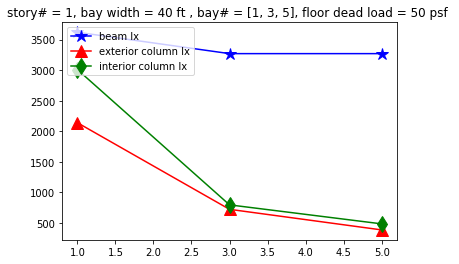

In [48]:
fig = plt.figure(figsize=(6, 4))
plt.plot(number_bay, beam_Zx, color='blue', marker='*', markersize=12, label='beam Ix')
plt.plot(number_bay, exterior_column_Ix, color='red', marker='^', markersize=12, label='exterior column Ix')
if number_bay != 1:
    plt.plot(number_bay, interior_column_Ix, color='green', marker='d', markersize=12, label='interior column Ix')
plt.legend(loc='upper left')
plt.title('story# = %s, bay width = %s ft , bay# = %s, floor dead load = %s psf ' 
          % (number_story, bay_width, number_bay, dead_load_floor))
plt.show()

In [1]:
IDs = [1566,
       1569,
       1572,
       1575,
       1578,
       1581,
       1584,
       1587,
       1590,
       1620,
       1623,
       1626,
       1629,
       1632,
       1635,
       1638,
       1641,
       1644,
       1674,
       1677,
       1680,
       1683,
       1686,
       1689,
       1692,
       1695,
       1698,
       1728,
       1731,
       1734,
       1737,
       1740,
       1743,
       1746,
       1749,
       1752,
       1782,
       1785,
       1788,
       1791,
       1794,
       1797,
       1800,
       1803,
       1806,
       1836,
       1839,
       1842,
       1845,
       1848,
       1851,
       1854,
       1857,
       1860,
       1890,
       1893,
       1896,
       1899,
       1902,
       1905,
       1908,
       1911,
       1914,
       1944,
       1947,
       1950,
       1953,
       1956,
       1959,
       1962,
       1965,
       1968,
       1998,
       2001,
       2004,
       2007,
       2010,
       2013,
       2016,
       2019,
       2022]

In [6]:
IDs[64:]

[1947,
 1950,
 1953,
 1956,
 1959,
 1962,
 1965,
 1968,
 1998,
 2001,
 2004,
 2007,
 2010,
 2013,
 2016,
 2019,
 2022]